# 1. 이해하기

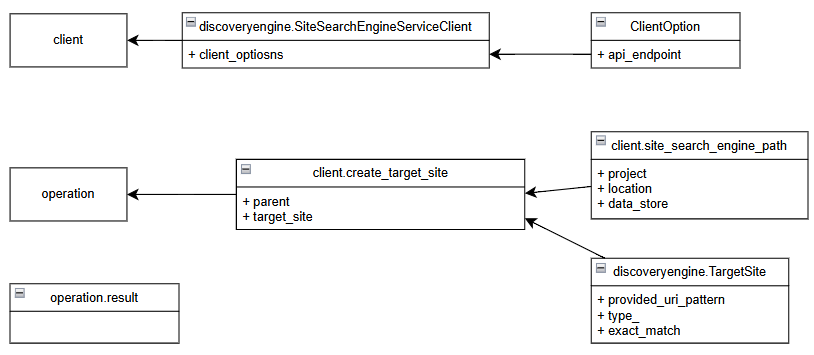

# 2. 코드 이해하기

## 2.1 라이브러리 설치

In [ ]:
!pip install google-cloud-discoveryengine

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## 2.2 client 생성

In [ ]:
PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION="global"
DATASTORE_ID="public-web-datastore"

In [ ]:
from google.api_core.client_options import ClientOptions

from google.cloud import discoveryengine_v1 as discoveryengine

In [ ]:
client_options = (
    ClientOptions(api_endpoint=f"{LOCATION}-discoveryengine.googleapis.com")
    if LOCATION != "global"
    else None
)

In [ ]:
client = discoveryengine.SiteSearchEngineServiceClient(
    client_options=client_options
)

## 2.3 패턴 등록

In [ ]:
parent = client.site_search_engine_path(
    project=PROJECT_ID, location=LOCATION, data_store=DATASTORE_ID
)

In [ ]:
uri_pattern = "cloud.google.com/generative-ai-app-builder/docs/*"

target_site = discoveryengine.TargetSite(
    provided_uri_pattern=uri_pattern,
    # Options: INCLUDE, EXCLUDE
    type_=discoveryengine.TargetSite.Type.INCLUDE,
    exact_match=False,
)

In [ ]:
operation = client.create_target_site(
    parent=parent,
    target_site=target_site,
)

## 2.4 결과 확인

In [ ]:
print(f"Waiting for operation to complete: {operation.operation.name}")
response = operation.result()

# After the operation is complete,
# get information from operation metadata
metadata = discoveryengine.CreateTargetSiteMetadata(operation.metadata)

# Handle the response
print("==== response ====")
print(response)
print("==== metadata ====")
print(metadata)

Waiting for operation to complete: 
==== response ====
name: "projects/429718924597/locations/global/collections/default_collection/dataStores/public-web-datastore/siteSearchEngine/targetSites/00062bcdc33fc475Y2xvdWQuZ29vZ2xlLmNvbS9nZW5lcmF0aXZlLWFpLWFwcC1idWlsZGVyL2RvY3MvKg"
provided_uri_pattern: "cloud.google.com/generative-ai-app-builder/docs/*"
type_: INCLUDE
generated_uri_pattern: "cloud.google.com/generative-ai-app-builder/docs/*"
root_domain_uri: "google.com"
update_time {
  seconds: 1737012604
  nanos: 290000000
}

==== metadata ====

